In [1]:
import boto3
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

## Defining the bucket 
s3 = boto3.resource('s3')
bucket_name = 'data-445'
bucket = s3.Bucket(bucket_name)

## Defining the csv file 
file_key = 'Fall_2021/In_Class_Assignments/framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
heart = pd.read_csv(file_content_stream)
heart = heart.dropna()
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
## Defining the input and target variables
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Building the logisitic model
logit_md = LogisticRegression().fit(X_train, Y_train)

## Predicting on the test dataset
preds = logit_md.predict_proba(X_test)[:, 1]
preds

array([0.3111745 , 0.20558713, 0.20382423, 0.07368673, 0.27830693,
       0.15196535, 0.05911253, 0.03858407, 0.30456261, 0.16593679,
       0.07330189, 0.08517185, 0.10750514, 0.09090487, 0.1549685 ,
       0.13043193, 0.04496332, 0.26864215, 0.04211631, 0.084257  ,
       0.11394637, 0.07408105, 0.30890625, 0.30625104, 0.23663478,
       0.07506649, 0.17914364, 0.31756851, 0.19107719, 0.1899149 ,
       0.25624531, 0.04822933, 0.27393139, 0.03760602, 0.09372456,
       0.13216645, 0.05063109, 0.15804072, 0.06502842, 0.13433086,
       0.09865902, 0.3205338 , 0.15860837, 0.05619585, 0.13773407,
       0.12581997, 0.28159313, 0.21487601, 0.15264462, 0.05180178,
       0.09292508, 0.3325885 , 0.10466942, 0.16805176, 0.29907373,
       0.11428588, 0.3587637 , 0.14742103, 0.2773248 , 0.1693798 ,
       0.0710598 , 0.28620422, 0.07709588, 0.08972367, 0.09806681,
       0.20484166, 0.08717506, 0.2889436 , 0.08456322, 0.07391658,
       0.0595465 , 0.12336235, 0.09752985, 0.09629962, 0.06986

In [3]:
## ROC 
False_Positive_Rate, True_Positive_Rate, cutoffs = roc_curve(Y_test, preds)

In [6]:
ROC_results = pd.DataFrame({'FPR': False_Positive_Rate, 'TPR': True_Positive_Rate, 'cutoff': cutoffs})
ROC_results.head()

,FPR,TPR,cutoff
0,0.000000,0.000000,1.570903
1,0.001590,0.000000,0.570903
2,0.007949,0.000000,0.492402
3,0.007949,0.009709,0.474252
4,0.015898,0.009709,0.445685


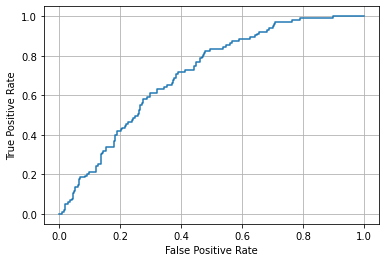

In [7]:
import matplotlib.pyplot as plt

plt.plot(ROC_results['FPR'], ROC_results['TPR'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()